In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.tools import diff
import math
from sklearn.metrics import mean_squared_error
import plotly.offline as pyo
import plotly.graph_objects as go
import chart_studio.plotly as py

In [3]:
data_energy = pd.read_csv("ei_isen_m_page_linear.csv", parse_dates=['TIME_PERIOD'], usecols = ['TIME_PERIOD', 'OBS_VALUE'])
data_energy 

,TIME_PERIOD,OBS_VALUE
0,2008-01-01,66938.0
1,2008-02-01,51604.0
2,2008-03-01,54080.0
3,2008-04-01,47718.0
4,2008-05-01,47867.0
...,...,...
191,2023-12-01,53595.0
192,2024-01-01,59824.0
193,2024-02-01,43856.0
194,2024-03-01,42718.0


In [4]:
print(data_energy['TIME_PERIOD'].min())
print(data_energy['TIME_PERIOD'].max())

2008-01-01 00:00:00
2024-04-01 00:00:00


In [5]:
data_energy2 = data_energy.set_index('TIME_PERIOD')
data_energy2

,OBS_VALUE
TIME_PERIOD,
2008-01-01,66938.0
2008-02-01,51604.0
2008-03-01,54080.0
2008-04-01,47718.0
2008-05-01,47867.0
...,...
2023-12-01,53595.0
2024-01-01,59824.0
2024-02-01,43856.0


<h3>Data</h3>

- Consumption of natural gas in Romania, unit of measurement: TJ (terajoules) on GCV (Gross calorific values)

<h4>Split the data in train and test</h4>

In [6]:
data_energy_train = data_energy[:-20]
data_energy_test = data_energy[-20:]
data_energy_test

,TIME_PERIOD,OBS_VALUE
176,2022-09-01,19178.0
177,2022-10-01,24612.0
178,2022-11-01,37183.0
179,2022-12-01,50428.0
180,2023-01-01,49825.0
181,2023-02-01,50019.0
182,2023-03-01,38678.0
183,2023-04-01,29100.0
184,2023-05-01,18321.0
185,2023-06-01,13521.0


<h4>Plots</h4>

<Axes: title={'center': 'Natural gas consumption 2008-2024'}, xlabel='TIME_PERIOD', ylabel='OBS_VALUE'>

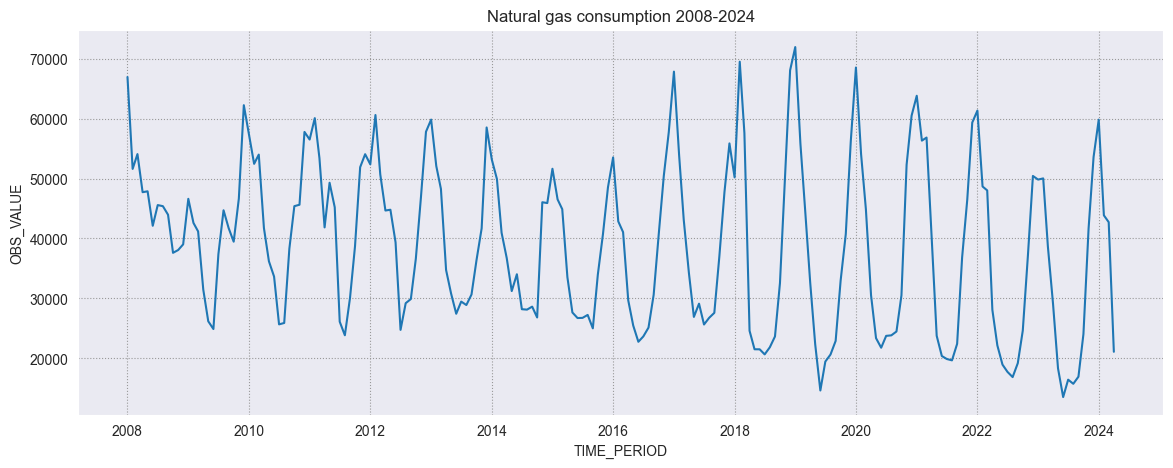

In [11]:
import seaborn as sns

plt.figure(figsize=(14,5))
plt.title('Natural gas consumption 2008-2024')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(data=data_energy, x='TIME_PERIOD', y='OBS_VALUE')

<Axes: title={'center': 'Log time series'}, xlabel='TIME_PERIOD', ylabel='OBS_VALUE'>

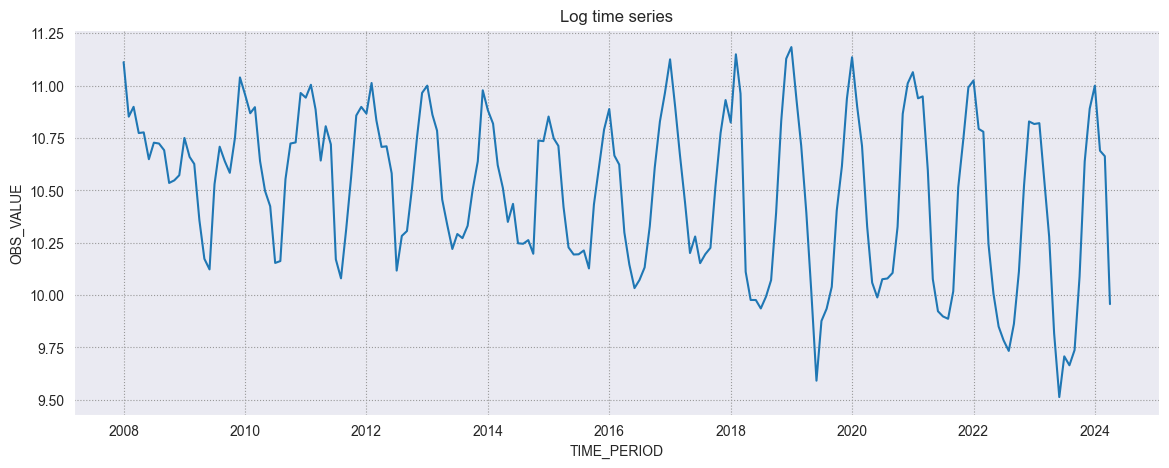

In [12]:
data_energy_log = pd.DataFrame(data_energy)
data_energy_log['OBS_VALUE'] = data_energy_log['OBS_VALUE'].apply(np.log)

plt.figure(figsize=(14,5))
plt.title('Log time series')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(data=data_energy_log, x='TIME_PERIOD', y='OBS_VALUE')


<Axes: title={'center': 'Diff d=1 time series'}>

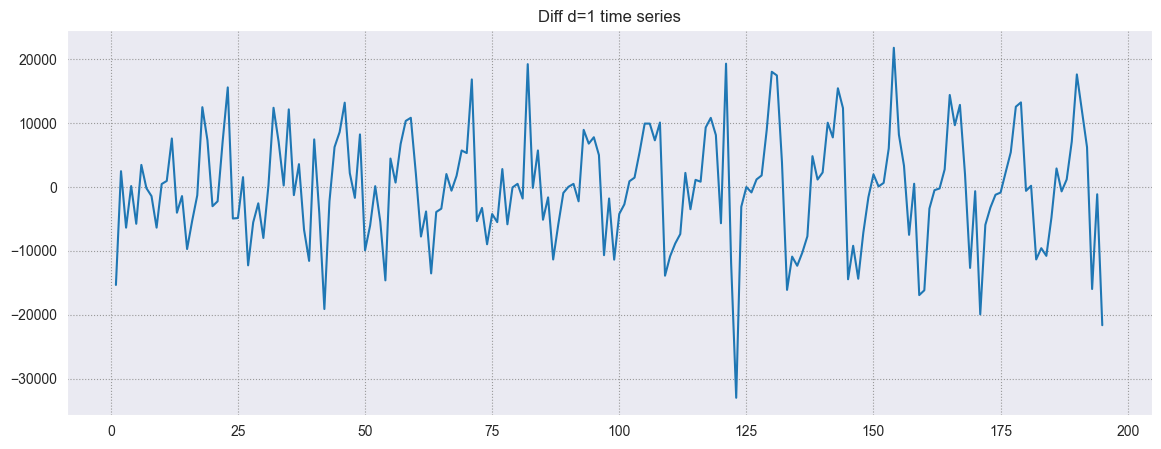

In [17]:
diff_df = np.append(math.nan,diff(data_energy['OBS_VALUE'], k_diff=1))

plt.figure(figsize=(14,5))
plt.title('Diff d=1 time series')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(data=diff_df)


<Axes: title={'center': 'Diff seasonal D=1 time series'}, ylabel='OBS_VALUE'>

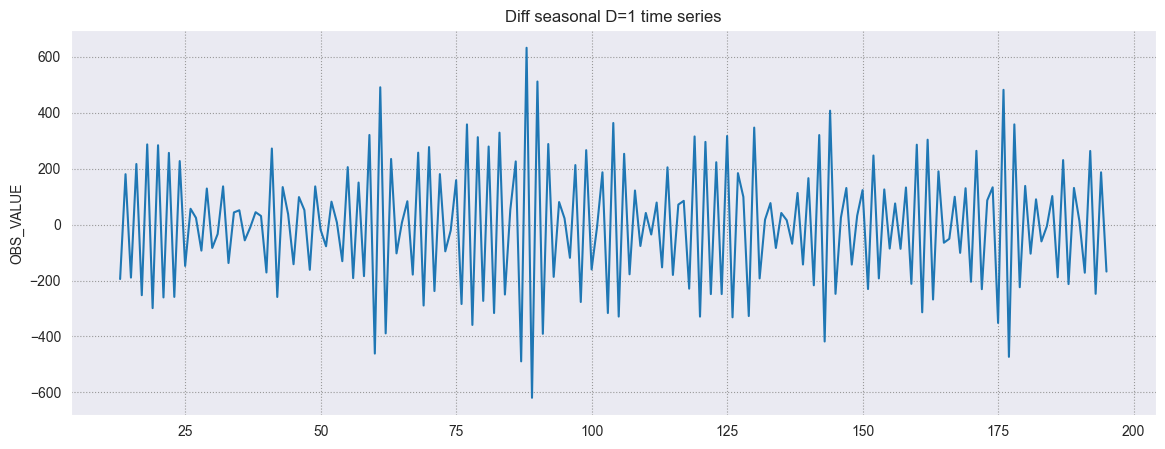

In [18]:
plt.figure(figsize=(14,5))
plt.title('Diff seasonal D=1 time series')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(data=diff(data_energy_log['OBS_VALUE'], k_diff=1, k_seasonal_diff=12))


<h4> Series decomposition </h4>

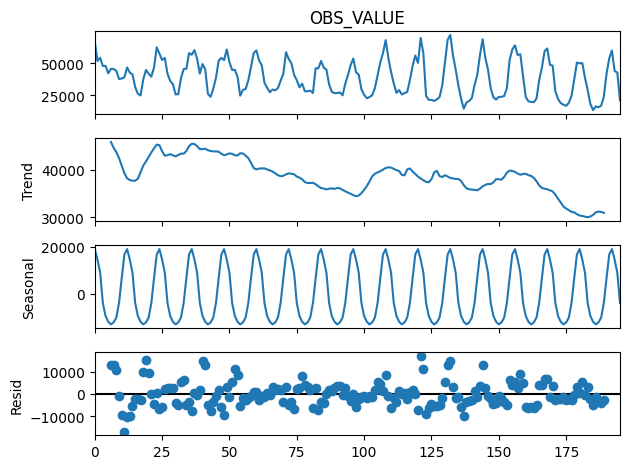

In [753]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data_energy['OBS_VALUE'],model='additive',period=12)
decomposition.plot()
plt.savefig('series_decomp.png')
plt.show()

<h3>Check ACF (autocorrelation function) and PACF (partial autocorrelation function)</h3>

In [754]:
list_ts = []

<h4>ACF PACF for original data</h4>


<h5>No differencing </h5>

- According to ACF plot we can see a seasonality, at 1 year lag, which may indicate we should test a seasonal MA process
- We can also see a seasonality in the PACF plot, the 12 th lag is increased, which can also indicate to test a seasonal AR process


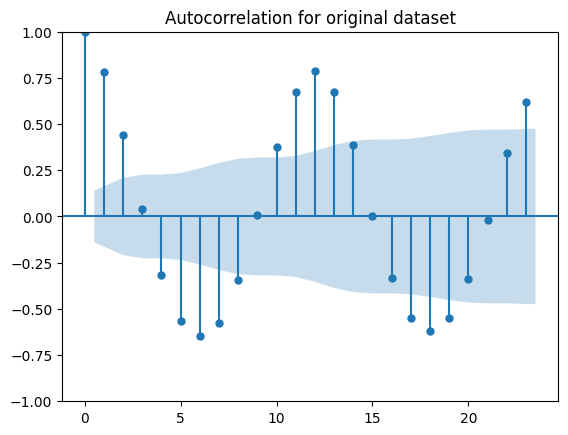

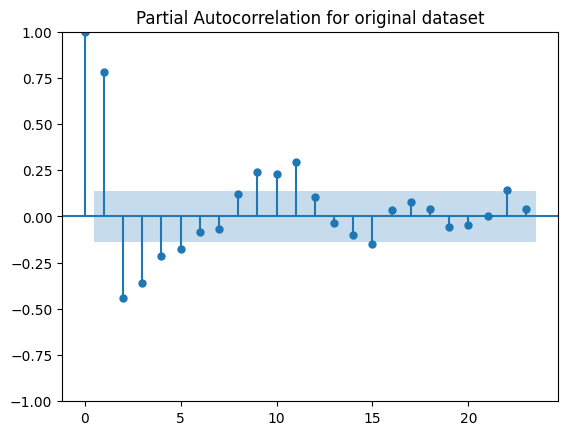

In [755]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_energy['OBS_VALUE'])
plt.title('Autocorrelation for original dataset')
plot_pacf(data_energy['OBS_VALUE'])
plt.title('Partial Autocorrelation for original dataset')
list_ts.append(('orig',data_energy['OBS_VALUE']))

<h5>Differencing d = 1</h5>

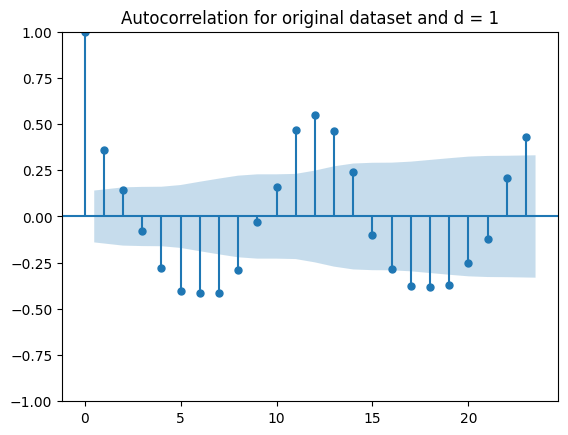

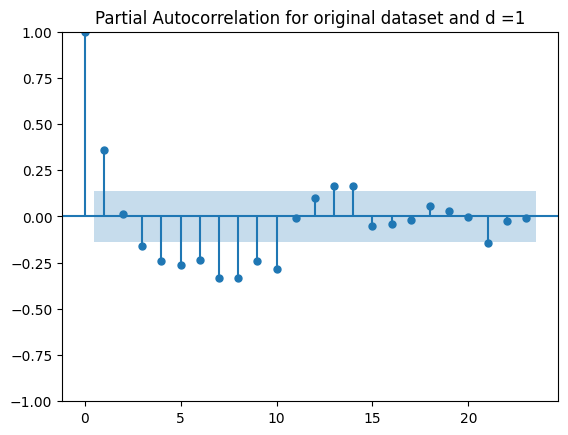

In [756]:
plot_acf(data_energy['OBS_VALUE'].diff()[1:])
plt.title('Autocorrelation for original dataset and d = 1')
plt.savefig('acf_diff.png')
plt.show()

plot_pacf(data_energy['OBS_VALUE'].diff()[1:])
plt.title('Partial Autocorrelation for original dataset and d =1')
plt.savefig('pacf_diff.png')
plt.show()
list_ts.append(('orig diff 1',data_energy['OBS_VALUE'].diff()[1:]))

<h5>Differencing d = 2</h5>

- models to try
    - ma(2), ar(2)

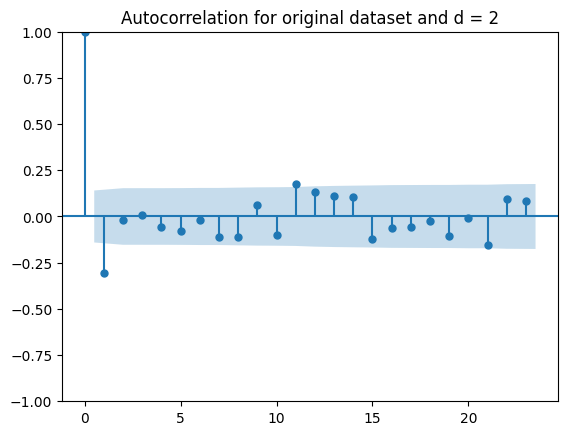

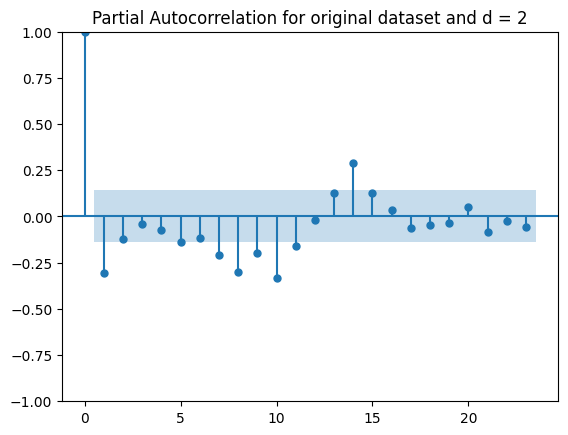

In [757]:
plot_acf(data_energy['OBS_VALUE'].diff().diff()[2:])
plt.title('Autocorrelation for original dataset and d = 2')

plot_pacf(data_energy['OBS_VALUE'].diff().diff()[2:])
plt.title('Partial Autocorrelation for original dataset and d = 2')
list_ts.append(('orig diff 2',data_energy['OBS_VALUE'].diff().diff()[2:]))

<h5>Seasonal differencing D=1</h5>

- significant spikes at seasonal lags => parameters for SAR, SMA 
- models to try:
    - ma(2), ar(2), sma(1), sar(1)

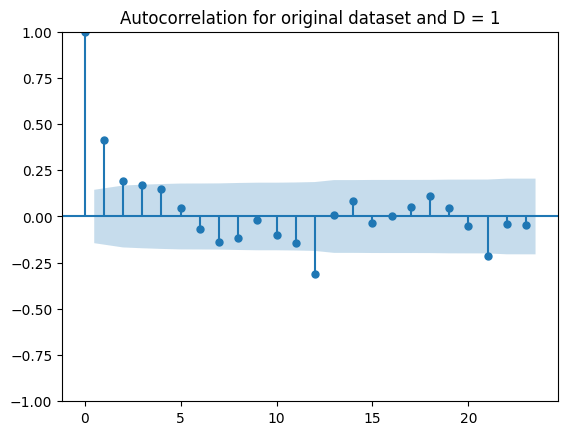

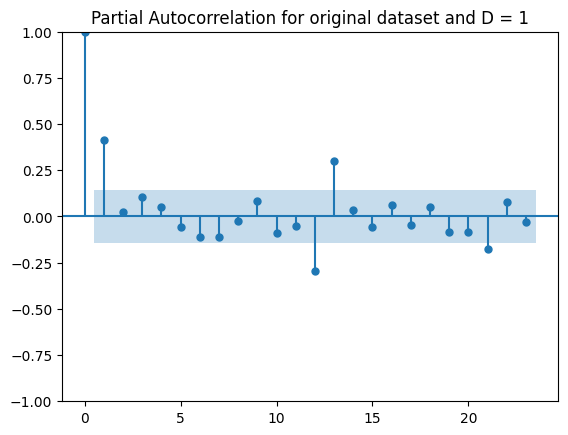

In [758]:
plot_acf(data_energy['OBS_VALUE'].diff(periods=12)[12:])
plt.title('Autocorrelation for original dataset and D = 1')
plt.savefig('acf_season_diff.png')
plot_pacf(data_energy['OBS_VALUE'].diff(periods=12)[12:])
plt.title('Partial Autocorrelation for original dataset and D = 1')
plt.savefig('pacf_season_diff.png')
list_ts.append(('orig diffseason 1',data_energy['OBS_VALUE'].diff(periods=12)[12:]))

<h5>d = 1 and D = 1</h5>

- models to try:
    - ma(1), ar(1), 
    - ma(3), ar(4), 
    - ma(3), ar(4), sma(1), sar(1)


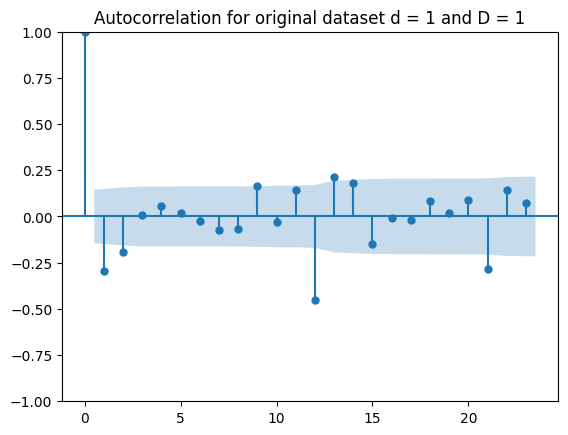

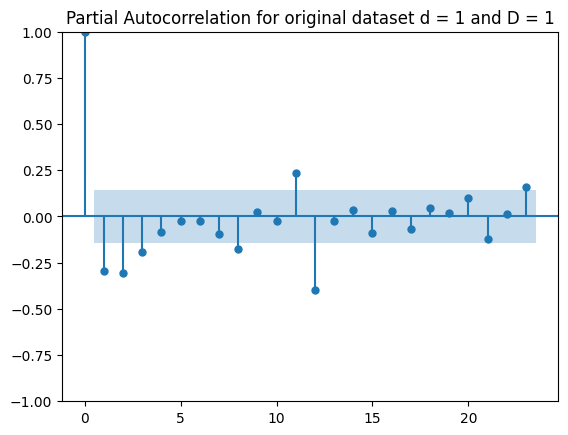

In [759]:
plot_acf(data_energy['OBS_VALUE'].diff(periods=12)[12:].diff()[1:])
plt.title('Autocorrelation for original dataset d = 1 and D = 1')

plot_pacf(data_energy['OBS_VALUE'].diff(periods=12)[12:].diff()[1:])
plt.title('Partial Autocorrelation for original dataset d = 1 and D = 1')
list_ts.append(('orig diffseason 1 diff 1',data_energy['OBS_VALUE'].diff(periods=12)[12:].diff()[1:]))

<h4>ACF PACF for log data</h4>

<h5>No differencing</h5>

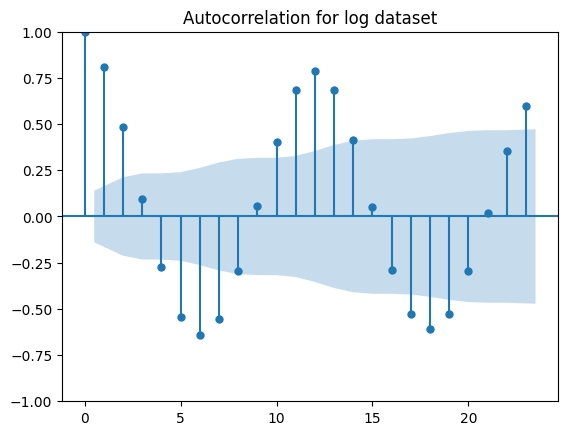

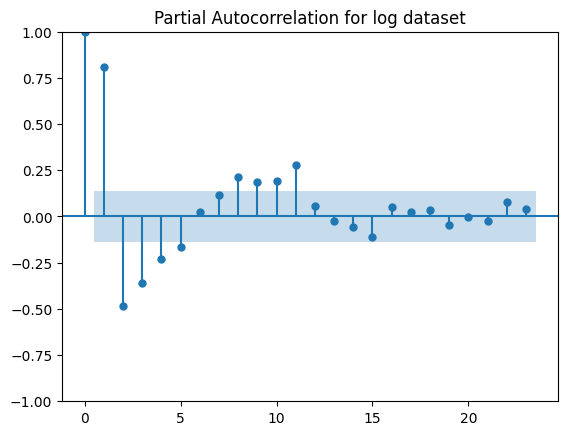

In [760]:
plot_acf(data_energy_log['OBS_VALUE'])
plt.title('Autocorrelation for log dataset')
plot_pacf(data_energy_log['OBS_VALUE'])
plt.title('Partial Autocorrelation for log dataset')
list_ts.append(('log',data_energy_log['OBS_VALUE']))

<h5>Differencing d = 1 </h5>

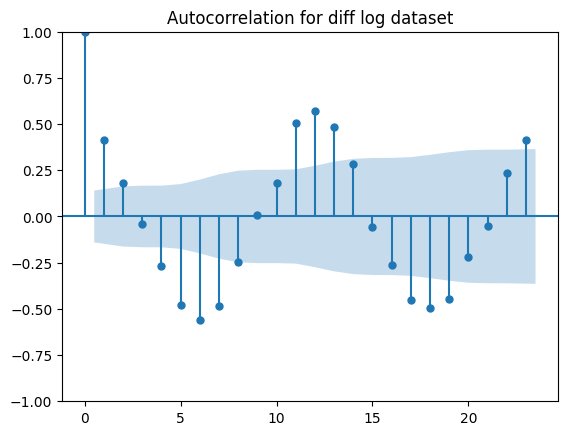

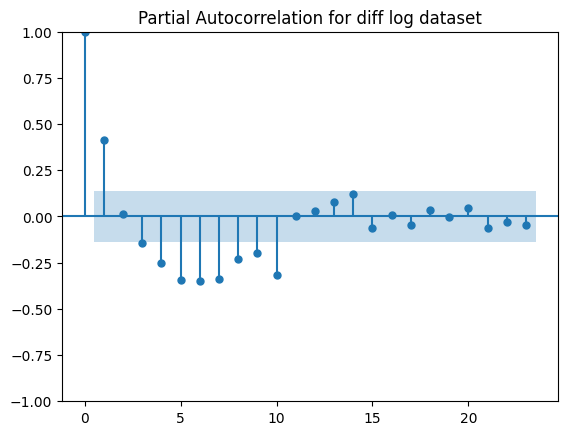

In [761]:
plot_acf(diff(data_energy_log['OBS_VALUE'], k_diff=1))
plt.title('Autocorrelation for diff log dataset')
plot_pacf(diff(data_energy_log['OBS_VALUE'], k_diff=1))
plt.title('Partial Autocorrelation for diff log dataset')
list_ts.append(('log diff 1',diff(data_energy_log['OBS_VALUE'], k_diff=1)))

<h5>Seasonal differencing D=1</h5>

- models to try:
    - ma(2), ar(2), sma(1), sar(1)

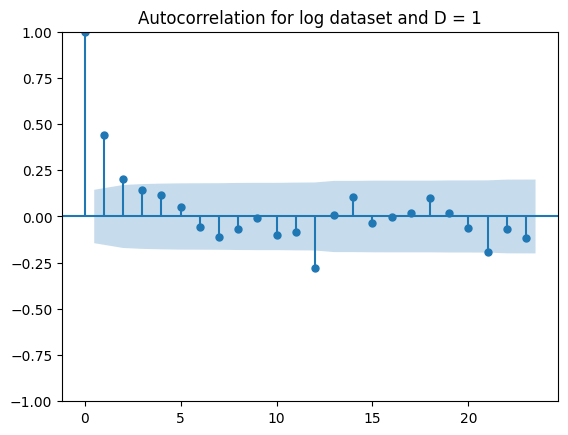

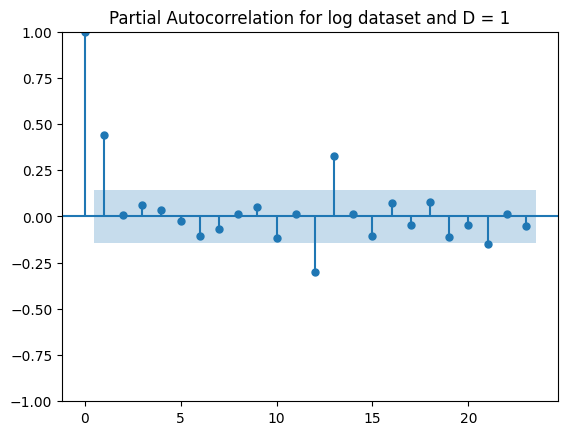

In [762]:
plot_acf(data_energy_log['OBS_VALUE'].diff(periods=12)[12:])
plt.title('Autocorrelation for log dataset and D = 1')

plot_pacf(data_energy_log['OBS_VALUE'].diff(periods=12)[12:])
plt.title('Partial Autocorrelation for log dataset and D = 1')

list_ts.append(('log seasondiff 1',data_energy_log['OBS_VALUE'].diff(periods=12)[12:]))

In [763]:
[el[0] for el in list_ts]

['orig',
 'orig diff 1',
 'orig diff 2',
 'orig diffseason 1',
 'orig diffseason 1 diff 1',
 'log',
 'log diff 1',
 'log seasondiff 1']

<h3>Test for stationarity</h3>

<h4>Augmented Dickey-Fuller test for unit root</h4>

- H0: Unit root is present, series not stationary
- H1: No unit root, series is stationary


In [767]:
from statsmodels.tsa.stattools import adfuller

for i in range(len(list_ts)):
    print(list_ts[i][0])
    print(f'ADF: {adfuller(list_ts[i][1])[1]}')

orig
ADF: 0.5800209520273144
orig diff 1
ADF: 1.9121688900085705e-05
orig diff 2
ADF: 2.4517462972859177e-26
orig diffseason 1
ADF: 0.006040081602525779
orig diffseason 1 diff 1
ADF: 1.644398129597245e-10
log
ADF: 0.8795744015778502
log diff 1
ADF: 1.7662724748012612e-05
log seasondiff 1
ADF: 0.019169411867199174


<h4>Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test</h4>

- H0: time series is trend-stationary
- H1: time series is not trend-stationary

In [669]:
from statsmodels.tsa.stattools import kpss

In [772]:
for i in range(len(list_ts)):
    print(list_ts[i][0])
    print(f'KPSS: {kpss(list_ts[i][1])[1]}')

orig
KPSS: 0.046254198168000714
orig diff 1
KPSS: 0.1
orig diff 2
KPSS: 0.1
orig diffseason 1
KPSS: 0.1
orig diffseason 1 diff 1
KPSS: 0.09148135261385672
log
KPSS: 0.01
log diff 1
KPSS: 0.1
log seasondiff 1
KPSS: 0.1


C:\Users\emmai\AppData\Local\Temp\ipykernel_15244\2852689840.py:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\emmai\AppData\Local\Temp\ipykernel_15244\2852689840.py:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\emmai\AppData\Local\Temp\ipykernel_15244\2852689840.py:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\emmai\AppData\Local\Temp\ipykernel_15244\2852689840.py:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\emmai\AppData\Local\Temp\ipykernel_15244\285268

<h3>Testing ARIMA models</h3>

In [672]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [673]:
list_arima_models = []
list_arima_types = [] # ((p,d,q),(P,D,Q,s))

<h4>ARIMA on original data</h4>

<h5>ARIMA ma(2), d=1, ar(2)</h5>

AIC                           4003.122
BIC                           4019.487
HQIC                          4009.748
MAE                           5340.083

In [674]:
data = data_energy_train['OBS_VALUE']

order= (2,1,2)
seasonal_order= ()


model = ARIMA(data, order=order)
model_result = model.fit()
print(model_result.mae)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('orig',order, seasonal_order))

c:\Users\emmai\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\emmai\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



5391.591063261282
                               SARIMAX Results                                
Dep. Variable:              OBS_VALUE   No. Observations:                  176
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1792.680
Date:                Sun, 02 Jun 2024   AIC                           3595.361
Time:                        17:03:18   BIC                           3611.185
Sample:                             0   HQIC                          3601.779
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7261      0.017    101.060      0.000       1.693       1.760
ar.L2         -0.9984      0.009   -105.748      0.000      -1.017      -0.980
ma.L1         -1.7150      0.100  

<h5>ARIMA ma(2), ar(2), D=0, sma(1), sar(1) on train data</h5>

AIC                           3195.148
BIC                           3219.598
HQIC                          3205.078
MAE                           4594.77

In [675]:
data = data_energy_train['OBS_VALUE']

order= (2,0,2)
seasonal_order= (1,0,1,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()
print(model_result.mae)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('orig',order, seasonal_order))

4482.180858284502
                                     SARIMAX Results                                      
Dep. Variable:                          OBS_VALUE   No. Observations:                  176
Model:             ARIMA(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood               -1777.644
Date:                            Sun, 02 Jun 2024   AIC                           3571.289
Time:                                    17:03:19   BIC                           3596.652
Sample:                                         0   HQIC                          3581.576
                                            - 176                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.961e+04   7133.376      5.553      0.000    2.56e+04    5.36e+04
ar.L1          1.

<h5>ARIMA ma(2), ar(2), D=1, sma(1), sar(1) on train data</h5>

AIC                           2981.184
BIC                           3002.021
HQIC                          2989.651
MAE                           7095.724

p values for coeff indicate not significant

In [676]:
data = data_energy_train['OBS_VALUE']

order= (2,0,2)
seasonal_order= (1,1,1,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()
print(model_result.mae)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('orig',order, seasonal_order))

6621.131296986047
                                     SARIMAX Results                                      
Dep. Variable:                          OBS_VALUE   No. Observations:                  176
Model:             ARIMA(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood               -1672.185
Date:                            Sun, 02 Jun 2024   AIC                           3358.370
Time:                                    17:03:19   BIC                           3380.069
Sample:                                         0   HQIC                          3367.179
                                            - 176                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2447      1.624      0.151      0.880      -2.938       3.427
ar.L2          0.

<h5>ARIMA ma(2), ar(2), D=1 on train data</h5>

AIC                           2973.957
BIC                           2988.841
HQIC                          2980.005
MAE                           8074.04


In [677]:
data = data_energy_train['OBS_VALUE']

order= (2,0,2)
seasonal_order= (0,1,0,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()
print(model_result.mae)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('orig',order, seasonal_order))

7577.780451101624
                                     SARIMAX Results                                     
Dep. Variable:                         OBS_VALUE   No. Observations:                  176
Model:             ARIMA(2, 0, 2)x(0, 1, [], 12)   Log Likelihood               -1673.972
Date:                           Sun, 02 Jun 2024   AIC                           3357.944
Time:                                   17:03:20   BIC                           3373.443
Sample:                                        0   HQIC                          3364.236
                                           - 176                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7677      0.046     38.217      0.000       1.677       1.858
ar.L2         -0.8812    

<h5>ARIMA (0,1,0) (1,0,1,12)</h5>

AIC                           3216.846
BIC                           3225.995
HQIC                          3220.562
MAE                           5650.54

In [678]:
data = data_energy_train['OBS_VALUE']

order= (0,1,0)
seasonal_order= (1,0,1,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()
print(model_result.mae)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('orig',order, seasonal_order))

5435.113850815023
                                     SARIMAX Results                                      
Dep. Variable:                          OBS_VALUE   No. Observations:                  176
Model:             ARIMA(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1796.575
Date:                            Sun, 02 Jun 2024   AIC                           3599.150
Time:                                    17:03:20   BIC                           3608.644
Sample:                                         0   HQIC                          3603.001
                                            - 176                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9581      0.039     24.757      0.000       0.882       1.034
ma.S.L12      -0.

<h5>ARIMA ma(1) d=1 ar(1) sma(1) D=1 </h5>

AIC                           2975.904
BIC                           2987.783
HQIC                          2980.731
MAE                           5703.66

In [679]:
data = data_energy_train['OBS_VALUE']

order= (1,1,1)
seasonal_order = (1,1,0,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()

predictions_test = model_result.forecast(len(data_energy_test))
data_test = data_energy_test['OBS_VALUE']
mse = mean_squared_error(data_test, predictions_test)

print(model_result.mae)
print(model_result.mse)
print(mse)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('orig',order, seasonal_order))

5465.661470402658
82078113.38709177
19391432.15453537
                                     SARIMAX Results                                     
Dep. Variable:                         OBS_VALUE   No. Observations:                  176
Model:             ARIMA(1, 1, 1)x(1, 1, [], 12)   Log Likelihood               -1673.745
Date:                           Sun, 02 Jun 2024   AIC                           3355.490
Time:                                   17:03:21   BIC                           3367.865
Sample:                                        0   HQIC                          3360.514
                                           - 176                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5205      0.102      5.098      0.000       0.320  

<h5>ARIMA (1,0,0) (0,0,1,12) </h5>

In [680]:
data = data_energy_train['OBS_VALUE']

order= (1,0,1)
seasonal_order = (0,0,1,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()

predictions_test = model_result.forecast(len(data_energy_test))
data_test = data_energy_test['OBS_VALUE']
mse = mean_squared_error(data_test, predictions_test)

print(model_result.mae)
print(model_result.mse)
print(mse)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('orig',order, seasonal_order))

5485.740849788741
51577538.38178913
157157388.8848613
                                    SARIMAX Results                                     
Dep. Variable:                        OBS_VALUE   No. Observations:                  176
Model:             ARIMA(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood               -1810.883
Date:                          Sun, 02 Jun 2024   AIC                           3631.765
Time:                                  17:03:21   BIC                           3647.618
Sample:                                       0   HQIC                          3638.195
                                          - 176                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.961e+04   3280.929     12.072      0.000    3.32e+04     4.6e+

<h4>ARIMA on log data</h4>

<h5>ARIMA (0,1,0) (1,0,1,12)</h5>

AIC                           -109.597
BIC                           -100.447
HQIC                          -105.881
MAE                            0.19
MSE                            0.13

In [681]:
data = data_energy_train['OBS_VALUE'].apply(np.log)

order= (0,1,0)
seasonal_order= (1,0,1,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()

predictions_test = model_result.forecast(len(data_energy_test))
data_test = data_energy_test['OBS_VALUE'].apply(np.log)
mse = mean_squared_error(data_test, predictions_test)

print(model_result.mae)
print(mse)
print(model_result.summary())


list_arima_models.append(model_result)
list_arima_types.append(('log',order, seasonal_order))

0.18131892059135649
0.05787101652184986
                                     SARIMAX Results                                      
Dep. Variable:                          OBS_VALUE   No. Observations:                  176
Model:             ARIMA(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                  69.216
Date:                            Sun, 02 Jun 2024   AIC                           -132.432
Time:                                    17:03:22   BIC                           -122.937
Sample:                                         0   HQIC                          -128.580
                                            - 176                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9670      0.034     28.236      0.000       0.900       1

<h5>ARIMA (0,1,0) (1,1,1,12)</h5>

AIC                           -100.401
BIC                            -94.462
HQIC                           -97.988
MAE                             0.22
MSE                             0.99
MSE_train                       0.07

In [682]:
data = data_energy_train['OBS_VALUE'].apply(np.log)

order= (0,1,0)
seasonal_order= (0,1,1,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()

predictions_test = model_result.forecast(len(data_energy_test))
data_test = data_energy_test['OBS_VALUE'].apply(np.log)
mse = mean_squared_error(data_test, predictions_test)

print(model_result.mae)
print(model_result.mse)
print(mse)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('log',order, seasonal_order))

0.21129989639874547
0.8916554570163975
0.0297858272186295
                                     SARIMAX Results                                      
Dep. Variable:                          OBS_VALUE   No. Observations:                  176
Model:             ARIMA(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  64.257
Date:                            Sun, 02 Jun 2024   AIC                           -124.513
Time:                                    17:03:22   BIC                           -118.326
Sample:                                         0   HQIC                          -122.001
                                            - 176                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7407      0.070    -10.613      0.000  

<h5>ARIMA ma(2), d=1, ar(2), sma(1), D=1, sar(1)</h5>

AIC                           -128.922
BIC                           -114.039
HQIC                          -122.875
MAE                            0.92
MSE                            8.83
MSE_train                      0.04

p values > 0.05 => coefficients not relevant

In [683]:
data = data_energy_train['OBS_VALUE'].apply(np.log)

order= (2,0,2)
seasonal_order= (1,1,1,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()

predictions_test = model_result.forecast(len(data_energy_test))
data_test = data_energy_test['OBS_VALUE'].apply(np.log)
mse = mean_squared_error(data_test, predictions_test)

print(model_result.mae)
print(model_result.mse)
print(mse)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('log',order, seasonal_order))

0.8381013678640589
7.883364528789435
0.04980627519202642
                                     SARIMAX Results                                      
Dep. Variable:                          OBS_VALUE   No. Observations:                  176
Model:             ARIMA(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood                  83.104
Date:                            Sun, 02 Jun 2024   AIC                           -152.209
Time:                                    17:03:24   BIC                           -130.510
Sample:                                         0   HQIC                          -143.400
                                            - 176                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5317      2.747      0.194      0.847   

<h5>ARIMA ar(1), D=1, sma(1), s=12 </h5>

AIC                           -131.006
BIC                           -122.076
HQIC                          -127.377
MAE                            0.92
MSE                            8.83
MSE_train                      0.04

In [684]:
data = data_energy_train['OBS_VALUE'].apply(np.log)

order= (1,0,0)
seasonal_order= (0,1,1,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()

predictions_test = model_result.forecast(len(data_energy_test))
data_test = data_energy_test['OBS_VALUE'].apply(np.log)
mse = mean_squared_error(data_test, predictions_test)

print(model_result.mae)
print(model_result.mse)
print(mse)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('log',order, seasonal_order))

0.8376198609241488
7.883665929382193
0.048226549608694796
                                     SARIMAX Results                                      
Dep. Variable:                          OBS_VALUE   No. Observations:                  176
Model:             ARIMA(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                  82.014
Date:                            Sun, 02 Jun 2024   AIC                           -158.028
Time:                                    17:03:25   BIC                           -148.728
Sample:                                         0   HQIC                          -154.252
                                            - 176                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5910      0.056     10.563      0.000  

<h5>ARIMA (1,0,0) (0,1,0,12) </h5>

AIC                            -93.189
BIC                            -87.235
HQIC                           -90.770
MAE                             0.94
MSE                             8.84
MSE_test                        0.04


In [685]:
data = data_energy_train['OBS_VALUE'].apply(np.log)

order= (1,0,0)
seasonal_order= (0,1,0,12)

model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_result = model.fit()

predictions_test = model_result.forecast(len(data_energy_test))
data_test = data_energy_test['OBS_VALUE'].apply(np.log)
mse = mean_squared_error(data_test, predictions_test)

print(model_result.mae)
print(model_result.mse)
print(mse)
print(model_result.summary())

list_arima_models.append(model_result)
list_arima_types.append(('log',order, seasonal_order))

0.8543916813005477
7.889765572717161
0.03896010915243227
                                    SARIMAX Results                                     
Dep. Variable:                        OBS_VALUE   No. Observations:                  176
Model:             ARIMA(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                  58.658
Date:                          Sun, 02 Jun 2024   AIC                           -113.317
Time:                                  17:03:25   BIC                           -107.117
Sample:                                       0   HQIC                          -110.800
                                          - 176                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4762      0.057      8.326      0.000       0.364       

<h4>Check models tested</h4>

In [686]:
for i in range(len(list_arima_models)):
    print(list_arima_types[i])

('orig', (2, 1, 2), ())
('orig', (2, 0, 2), (1, 0, 1, 12))
('orig', (2, 0, 2), (1, 1, 1, 12))
('orig', (2, 0, 2), (0, 1, 0, 12))
('orig', (0, 1, 0), (1, 0, 1, 12))
('orig', (1, 1, 1), (1, 1, 0, 12))
('orig', (1, 0, 1), (0, 0, 1, 12))
('log', (0, 1, 0), (1, 0, 1, 12))
('log', (0, 1, 0), (0, 1, 1, 12))
('log', (2, 0, 2), (1, 1, 1, 12))
('log', (1, 0, 0), (0, 1, 1, 12))
('log', (1, 0, 0), (0, 1, 0, 12))


<h3>Metrics</h3>

<h4>General Criterias</h4>

- log likelihood = probability that observed data came from estimated model (bigger value, better model)
- AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), HQIC (Hannan-Quinn information criterion) (lower values, better model)
- p values for parameters: AR(1), MA(1).. should have p < 0.05 to be relevant (it means coefficients were computed correctly?)
- MAE & MAPE (Mean Absolute Percentage Error) lower => better model
- RMSE (Root Mean Sqaured Error) lower => better model

In [775]:
from sklearn import metrics

for i in range(len(list_arima_models)):
    
    print(list_arima_types[i])
    print(f'MAE: {list_arima_models[i].mae}')
    print(f'MSE: {list_arima_models[i].mse}')
    rmse = np.sqrt(metrics.mean_squared_error(data_energy_train['OBS_VALUE'], list_arima_models[i].fittedvalues))
    print(f'RMSE: {rmse}')
    print(list_arima_models[i].summary())
    print('///////////////////////////////////')

('orig', (2, 1, 2), ())
MAE: 5391.591063261282
MSE: 69913405.32214867
RMSE: 8361.423642068896
                               SARIMAX Results                                
Dep. Variable:              OBS_VALUE   No. Observations:                  176
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1792.680
Date:                Sun, 02 Jun 2024   AIC                           3595.361
Time:                        21:34:54   BIC                           3611.185
Sample:                             0   HQIC                          3601.779
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7261      0.017    101.060      0.000       1.693       1.760
ar.L2         -0.9984      0.009   -1

<h4>Residuals</h4>

<h5> Residuals plots: Standardized residuals, QQ plot, Correlogram</h5>

- standardized residuals should look like white noise
- histogram os residuals should be close to normal distribution
- QQ plot: data should be close to the line
- Correlogram (ACF plot): no significant autocorrelation after lag 0

('orig', (2, 1, 2), ())


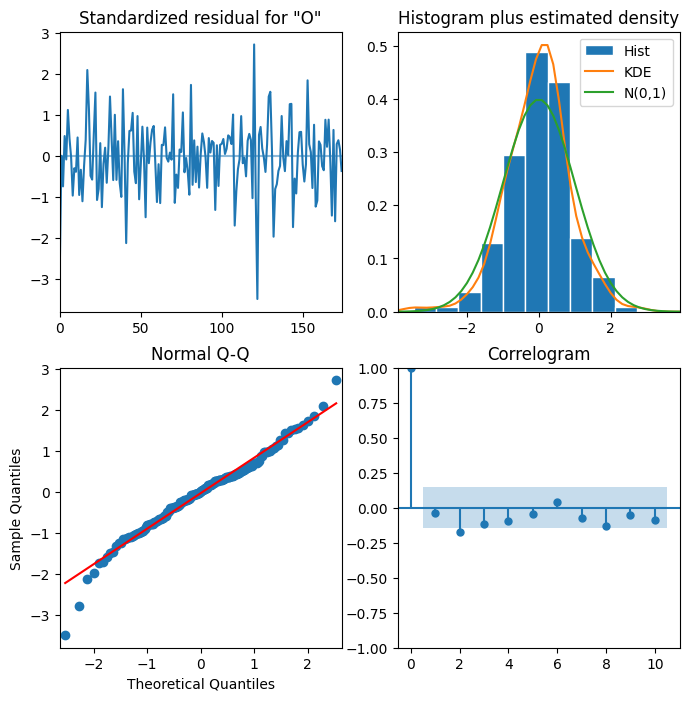

('orig', (2, 0, 2), (1, 0, 1, 12))


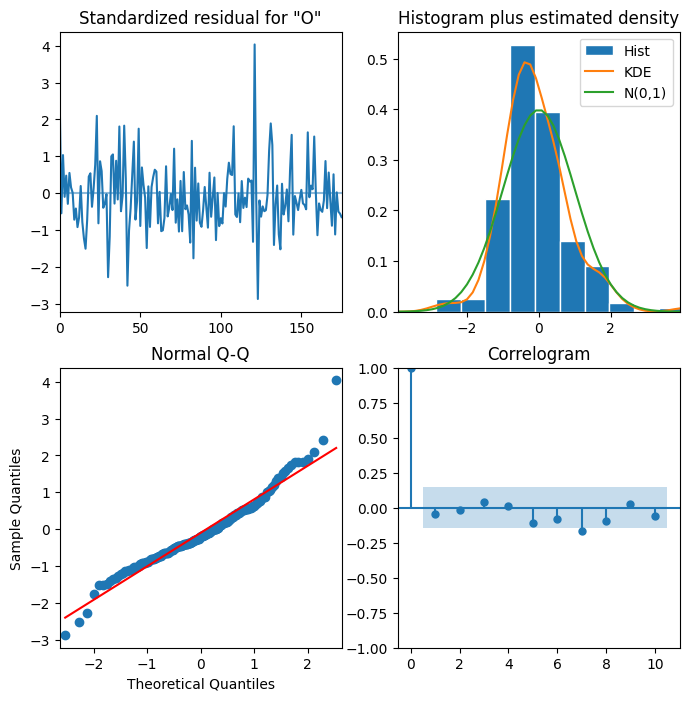

('orig', (2, 0, 2), (1, 1, 1, 12))


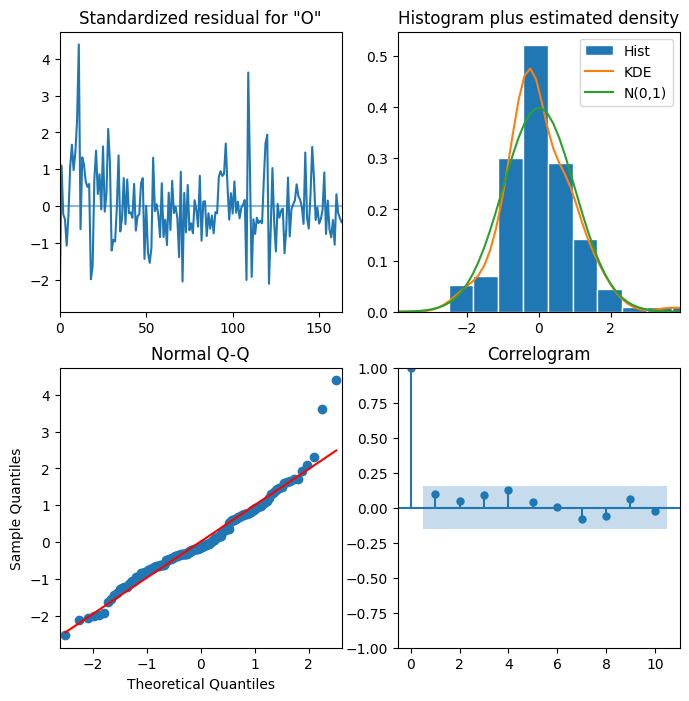

('orig', (2, 0, 2), (0, 1, 0, 12))


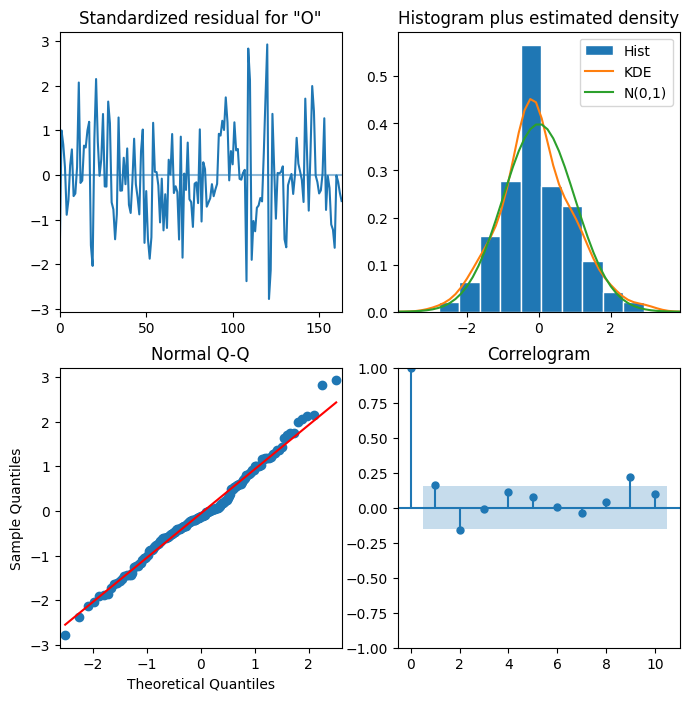

('orig', (0, 1, 0), (1, 0, 1, 12))


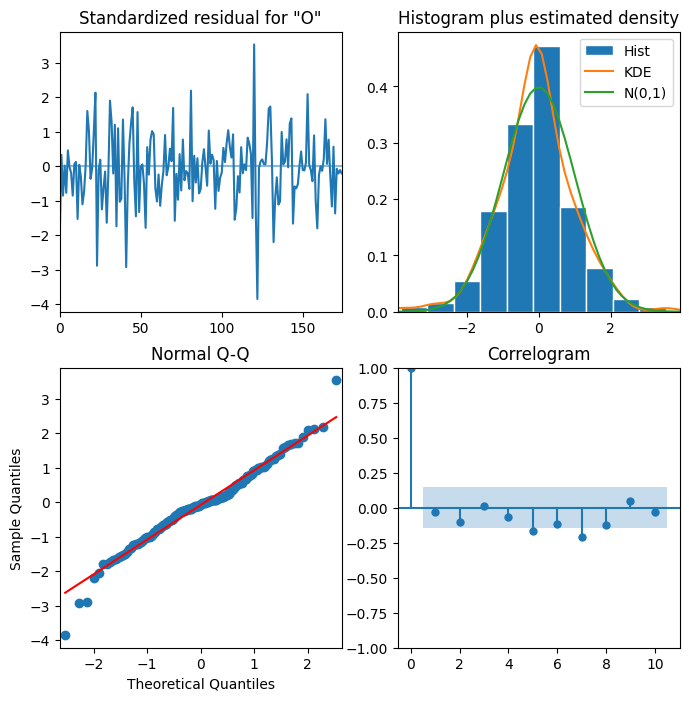

('orig', (1, 1, 1), (1, 1, 0, 12))


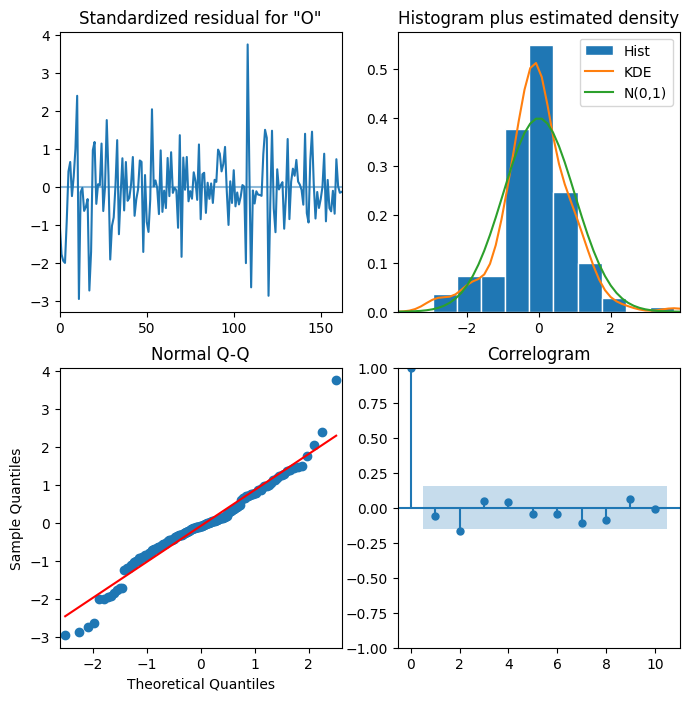

('orig', (1, 0, 1), (0, 0, 1, 12))


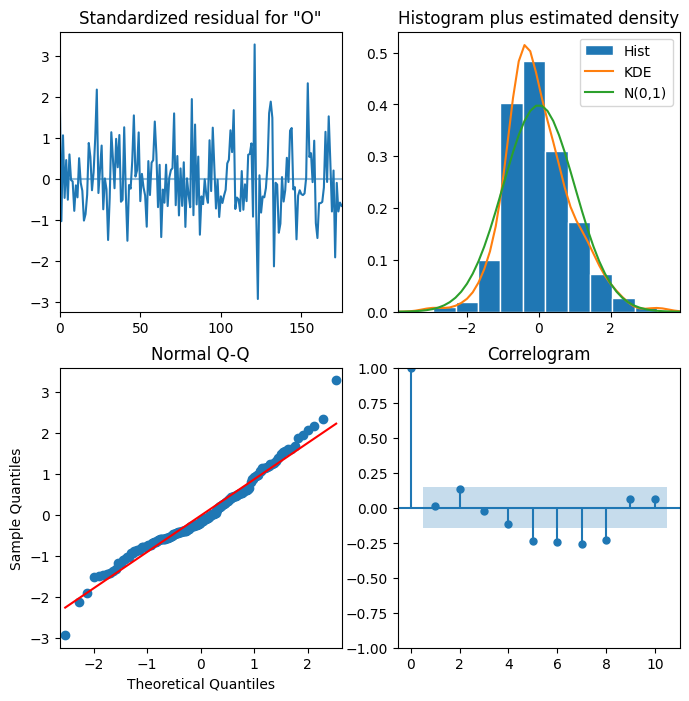

('log', (0, 1, 0), (1, 0, 1, 12))


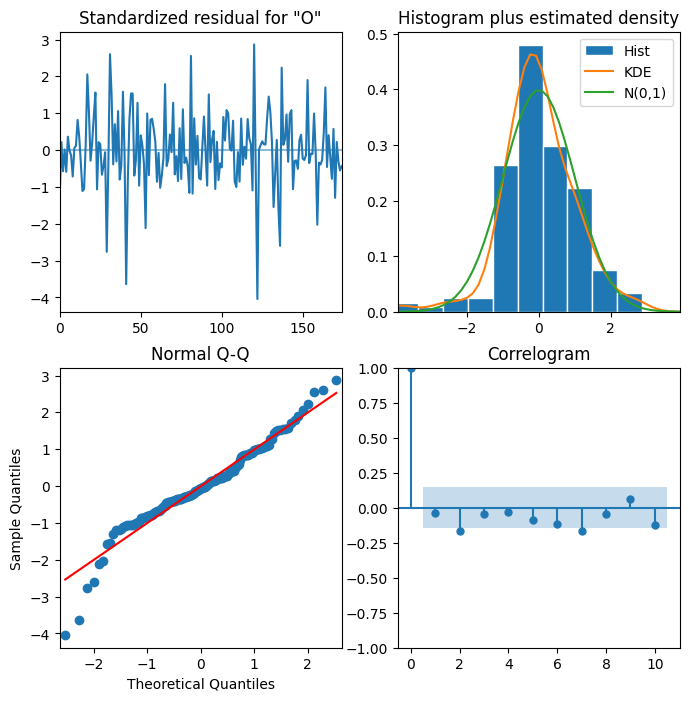

('log', (0, 1, 0), (0, 1, 1, 12))


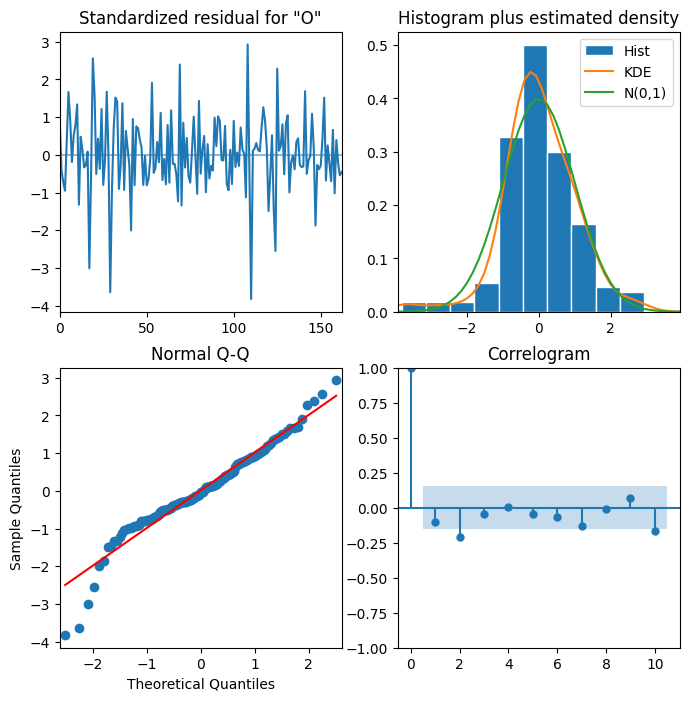

('log', (2, 0, 2), (1, 1, 1, 12))


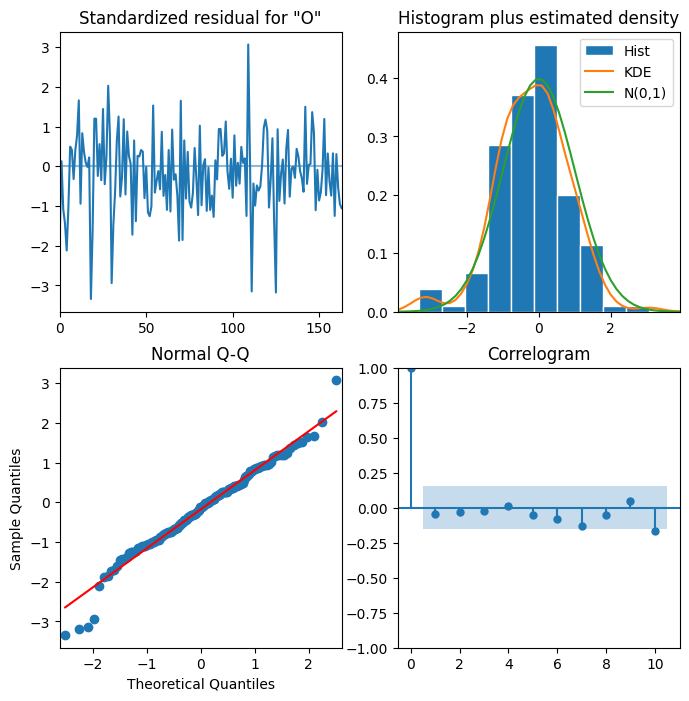

('log', (1, 0, 0), (0, 1, 1, 12))


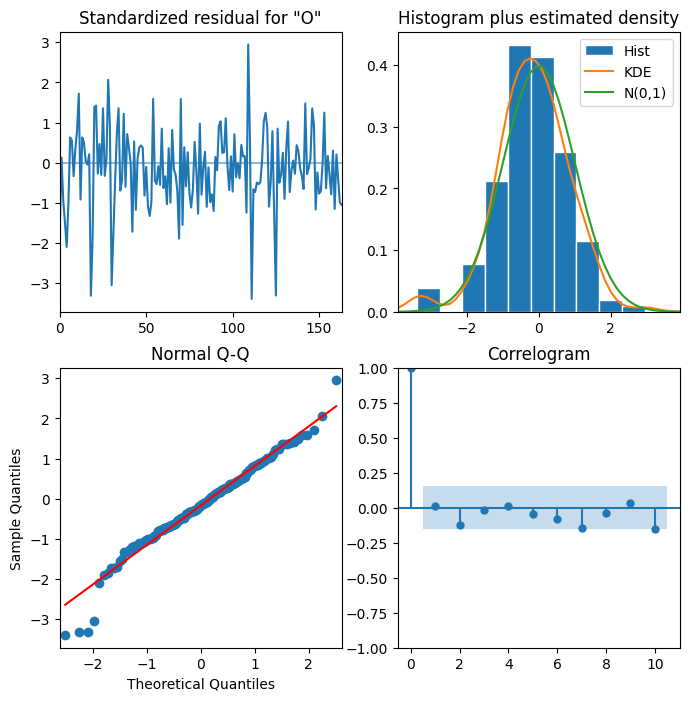

('log', (1, 0, 0), (0, 1, 0, 12))


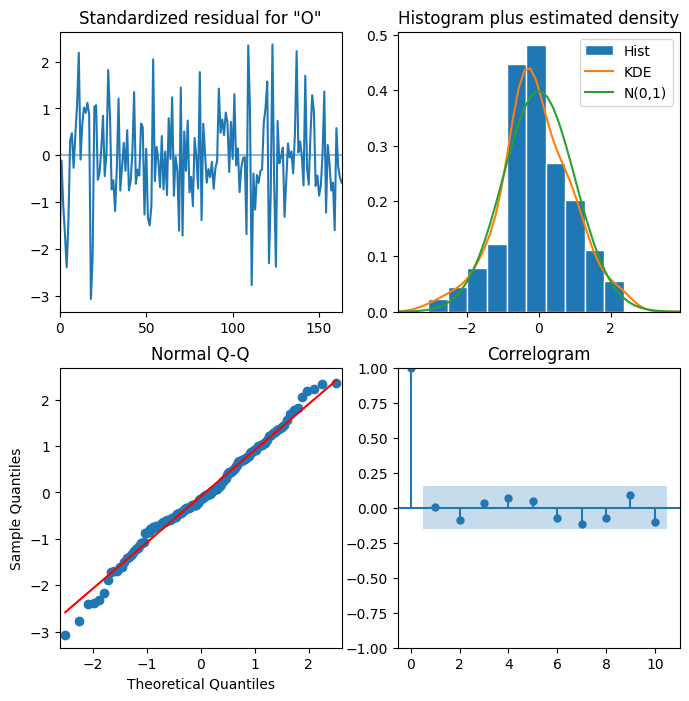

In [688]:
for i in range(len(list_arima_models)):
    print(list_arima_types[i])
    list_arima_models[i].plot_diagnostics(figsize=(8,8))
    plt.show()

<h5>Ljung Box test</h5>

- shows if residuals are independent
- H0: residuals are independent ( p > 0.05) => good model
- H1: residuals are not independent, they are correlated ( p < 0.05)

In [689]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [690]:
for i in range(len(list_arima_models)):
    print(list_arima_types[i])
    print(acorr_ljungbox(list_arima_models[i].resid))
    print('///////////////////////////////////')

('orig', (2, 1, 2), ())
      lb_stat  lb_pvalue
1    3.695913   0.054546
2    5.771715   0.055807
3    7.755168   0.051352
4    8.020659   0.090824
5    8.231887   0.143910
6    9.250168   0.159990
7    9.383825   0.226261
8   10.661868   0.221604
9   11.679973   0.231958
10  12.597836   0.247034
///////////////////////////////////
('orig', (2, 0, 2), (1, 0, 1, 12))
      lb_stat  lb_pvalue
1    0.402463   0.525820
2    0.488386   0.783336
3    0.667008   0.880935
4    0.832767   0.934002
5    2.726490   0.742064
6    3.281294   0.772803
7    7.532394   0.375624
8    9.189962   0.326525
9    9.190659   0.419864
10  10.025375   0.438270
///////////////////////////////////
('orig', (2, 0, 2), (1, 1, 1, 12))
       lb_stat     lb_pvalue
1    37.850172  7.639164e-10
2    74.186299  7.774094e-17
3   102.900067  3.696945e-22
4   129.397037  5.240177e-27
5   144.244859  2.239221e-29
6   155.598045  5.062855e-31
7   162.712037  8.616140e-32
8   168.043830  3.314126e-32
9   174.155717  8.39853

<h3>Forecasting</h3>


<h4>Show ARIMA forecasts for original data </h4>

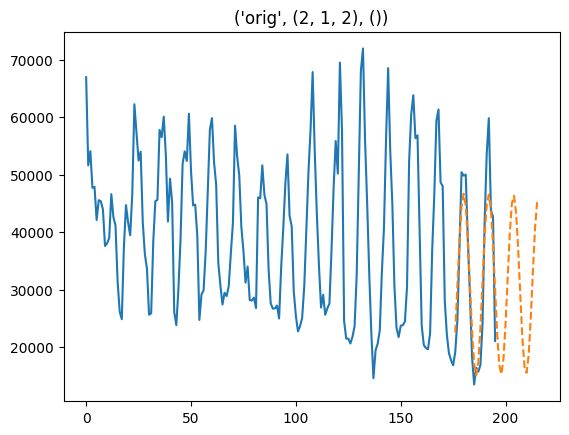

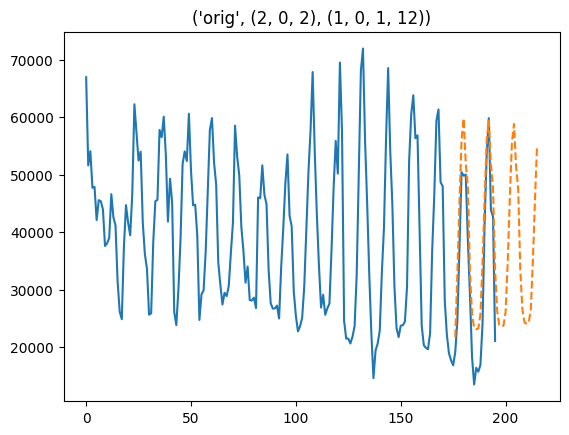

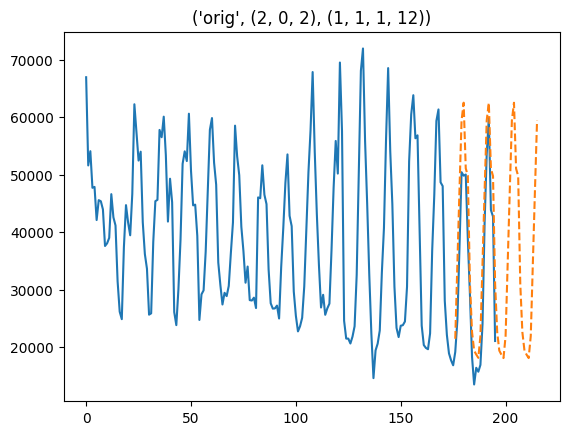

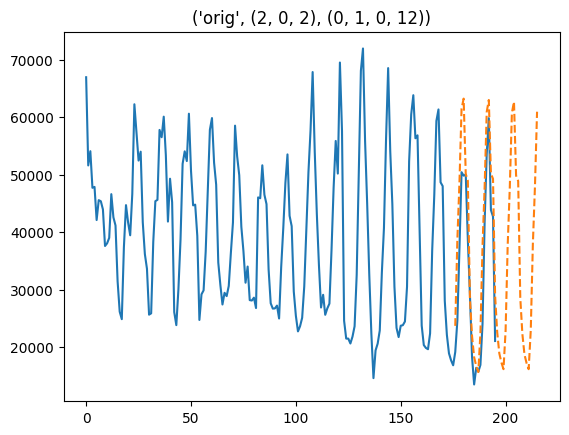

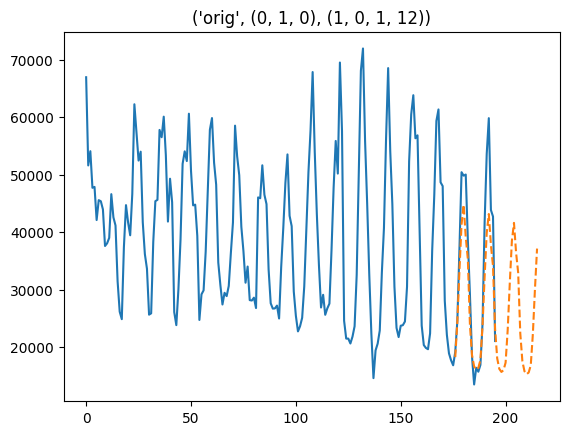

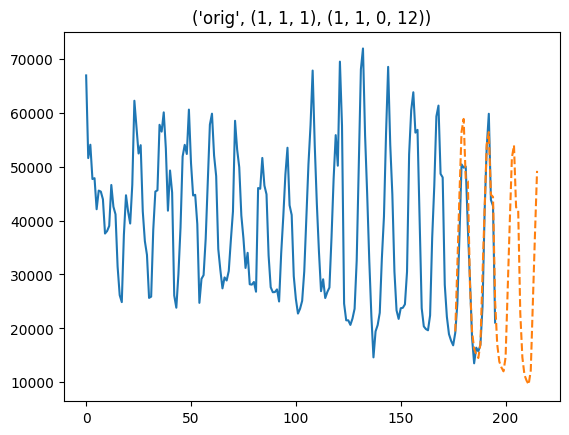

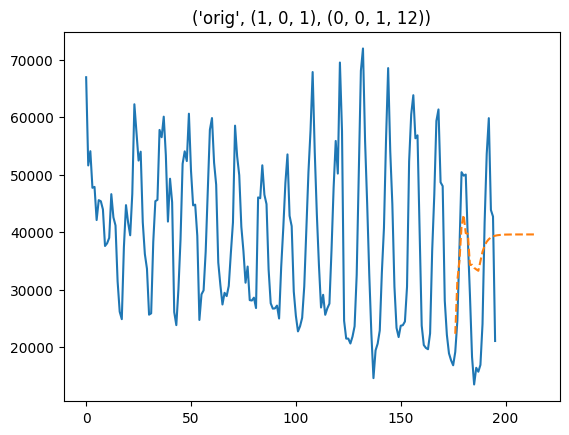

In [778]:
for i in range(len(list_arima_models)):
    if(list_arima_types[i][0] == 'orig'):
        forecast_result = np.array(list_arima_models[i].forecast(len(data_energy_test)+20))

        conf_int_95 = list_arima_models[i].get_forecast(len(data_energy_test)+20).conf_int(alpha=0.05) 
        arr = np.append(np.full(shape=len(data_energy_train), fill_value=None), forecast_result)
        plt.plot(data_energy['OBS_VALUE'])
        plt.plot(arr, linestyle='--')

        plt.title(f'{list_arima_types[i]}')
        plt.show()


<h4>Show ARIMA forecasts for log data</h4>

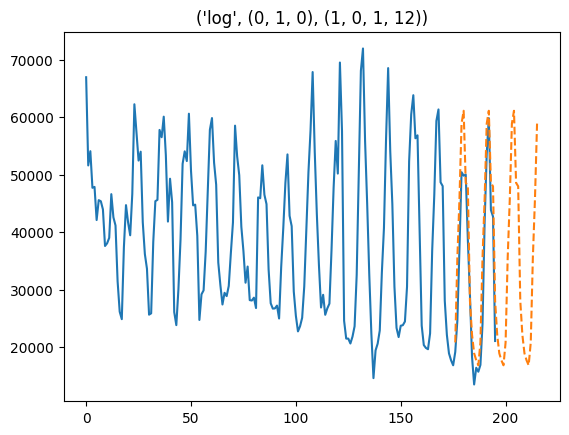

In [776]:


for i in range(len(list_arima_models)):
    if(list_arima_types[i][0] == 'log'):
        forecast_result = np.array(list_arima_models[-1].forecast(len(data_energy_test)+20))
        exponential_result = np.array ([math.exp(el) for el in forecast_result])

        arr = np.append(np.full(shape=len(data_energy_train), fill_value=None), exponential_result)

        plt.plot(data_energy['OBS_VALUE'])
        plt.plot(arr, linestyle='--')


        plt.title(f'{list_arima_types[i]}')
        plt.show()
